In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Importing and Reading the data

In [2]:
# importing the data
lead=pd.read_csv(r'C:\Users\ADMIN\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')


#### Reading the data

In [3]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# checking the shape of data
lead.shape

(9240, 37)

In [5]:
# checking null values and the data type
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### The data type of the columns looks fair enough. However, there appears a lot of missing values. Lets go ahead and inspect them.

In [6]:
# null values count
null_vals=lead.isnull().sum()
null_vals

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# checking the percentage of null values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### As we can see there are few columns that have more than 30% of missing values, these do look suspicious but before handling them, lets look a bit deeper why these are null.

In [8]:
# checking the statistical info of the data
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### As we can see some columns such as 'totalVisits', 'Total Time Spent on Website' and 'Page Views Per Visit' are having outliers and other coulumns look fair enough. So, lets go ahead and clean the data. 

### Data Cleaning

#### After inspecting the data it was found that some column have values called select, as the customer did not select any option. Lets go ahead convert these to nan.

In [9]:
# Check if there are any duplicate values in the dataset
lead[lead.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [10]:
# Replacing 'Select' with NaN 
lead=lead.applymap(lambda x:x.lower() if type(x) == str else x)
lead=lead.replace('select',np.nan)

In [11]:
lead.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened


####  So as we can see the select has been converted to null values, now lets proceed further and check for columns with skewness.

In [12]:
# Checking if there are columns with one unique value as it won't affect our analysis
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [13]:
# Dropping these one unique valued columns as it cannot help in predicting successful lead case
lead=lead.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [14]:
# Rechecking the % of null values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

#### As we can see there are null values now after further inspection lets drop columns with more than 30% null values as it is not advisable to impute more than approx. 30% of data based on predictions and assumptions.


In [15]:
# Dropping columns with more than 30% null values
lead=lead.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [16]:
# rechecking null values %
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### So, we have removed variables which have null values 30% and more , however there are still null values which are < 30 % remaining lets inspect each one of them and try to impute them accordingly.

In [17]:
# checking missing values in variable lead source
lead['Lead Source'].value_counts()

google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
press_release           2
social media            2
live chat               2
blog                    1
welearnblog_home        1
testone                 1
youtubechannel          1
pay per click ads       1
nc_edm                  1
welearn                 1
Name: Lead Source, dtype: int64

#### So as we can see Google appears the most lets replace the missing values with Google. 

In [18]:
# replacing missing values with Google for variable 'Lead Source'
lead['Lead Source'] = lead['Lead Source'].replace(np.nan,'Google')

In [19]:
# checking missing values in variable Total visits
lead['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

#### We can see 0.0 is the most occurring, however in this case it is more preferable to replace with median as it is a continuous variable rather than categorical.

In [20]:
# replacing the variable 'Totalvisits' with median
lead['TotalVisits']=lead['TotalVisits'].replace(np.nan,lead['TotalVisits'].median())

In [21]:
# Checking variable page views per visit
lead['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

#### Here the max is 0.0, again it is preferable to replace with median

In [22]:
# replacing missing values with median for variable 'Page Views Per Visit'
lead['Page Views Per Visit']=lead['Page Views Per Visit'].replace(np.nan,lead['Page Views Per Visit'].median())

#### The variable 'Last Activity' does have some missing value but before treating it we know that it is a redundant variable, as it seems to be of no use for our analysis so lets drop it rather than treating it.

In [23]:
# Dropping variable 'Last Activity'
lead=lead.drop('Last Activity',axis=1)

In [24]:
# Checking variable country for missing values
lead['Country'].value_counts()

india                   6492
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
south africa               4
kuwait                     4
canada                     4
germany                    4
nigeria                    4
sweden                     3
asia/pacific region        2
uganda                     2
china                      2
belgium                    2
philippines                2
italy                      2
ghana                      2
netherlands                2
bangladesh                 2
switzerland                1
kenya                      1
tanzania                   1
liberia                    1
denmark                    1
russia                     1
indonesia     

In [25]:
skewness1=round(100*len(lead[lead['Country'] =='india'])/len(lead['Country']),2)
print(skewness1)

70.26


#### We can see India appears the most but before imputing we notice that this variable is highly skewed, i.e. india appears 70.26 % times  and also has a missing of 26.63%, so it is better to drop it rather than treating it. 

In [26]:
# Dropping variable 'Country'
lead=lead.drop(['Country'],axis=1)

In [27]:
# Checking variable what is your current occupation for missing values
lead['What is your current occupation'].value_counts()

unemployed              5600
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

#### This is an important variable so rather than imputing with mode lets replace the missing columns with 'No info provided' as nothing was provided hence missing.

In [28]:
# Replacing the missing values with 'No info provided'
lead['What is your current occupation']=lead['What is your current occupation'].replace(np.nan,'No info provided')

In [29]:
# Checking variable What matters most to you in choosing a course  for missing values.
lead['What matters most to you in choosing a course'].value_counts()

better career prospects      6528
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [30]:
skewness2=round(100*len(lead[lead['What matters most to you in choosing a course'] == 'better career prospects'])/len(lead['What matters most to you in choosing a course']),2)
print(skewness2)

70.65


#### This  variable is also highly skewed i.e. better career aspects appears 70.65 % and also has 29.32% of missing values, so lets drop it.

In [31]:
# Dropping the varaible 'What matters most to you in choosing a course'
lead=lead.drop(['What matters most to you in choosing a course'],axis=1)

In [32]:
lead.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

#### All the missing values have been treated but before proceeding further there are some redundant variables not required for analysis lets drop them aswell.

In [33]:
lead=lead.drop(['Lead Number','Prospect ID','Last Notable Activity'],axis=1)

In [34]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   What is your current occupation         9240 non-null   object 
 9   Search                                  9240 non-null   object 
 10  Newspaper Article                       9240 non-null   obje

#### Now everything looks fair enough to proceed further

### Outlier Treatment

In [35]:
# checking for outliers
round(lead.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.00,9240.00,9240.00,9240.00
mean,0.39,3.44,487.70,2.36
std,0.49,4.82,548.02,2.15
min,0.00,0.00,0.00,0.00
15%,0.00,0.00,0.00,0.00
35%,0.00,2.00,98.00,1.50
50%,0.00,3.00,248.00,2.00
55%,0.00,3.00,305.00,2.00
75%,1.00,5.00,936.00,3.00
95%,1.00,10.00,1562.00,6.00


#### So we can see there are outliers in the total visits and page views per visit column, lets go ahead and visualize them further using boxplots.

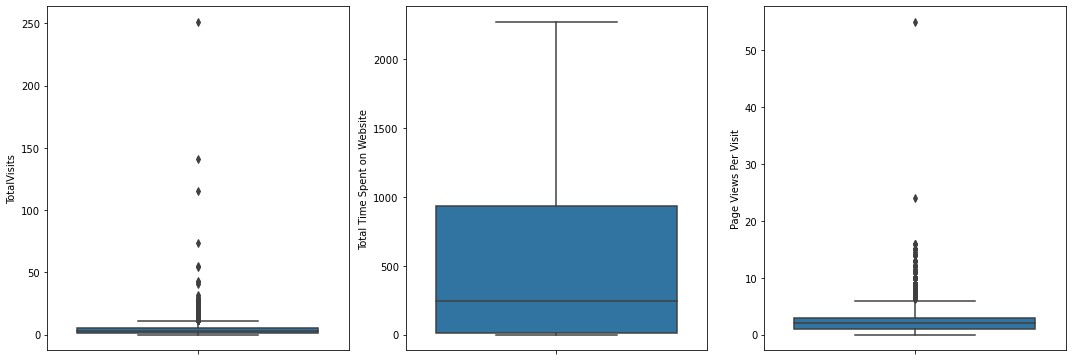

In [36]:
plt.figure(figsize=(15,20))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits',data = lead)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website',data = lead)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit',data = lead)
plt.tight_layout()
plt.show()


#### After visualising we can see mostly outliers in 99% quantile so lets drop the values beyond 99%.

In [37]:
# Treating outliers for total visit column
capping1=lead['TotalVisits'].quantile(0.99)
lead=lead[lead["TotalVisits"] < capping1]
lead["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [38]:
# Treating outliers for page views per visit
capping2=lead['Page Views Per Visit'].quantile(0.99)
lead=lead[lead["Page Views Per Visit"] < capping2]
lead["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [39]:
# Rechecking the outliers
lead.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000
mean,0.385092,3.087164,483.133016,2.226383
std,0.486644,2.801244,547.420675,1.823395
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,7.000000,1.000000
50%,0.000000,3.000000,245.000000,2.000000
75%,1.000000,4.000000,929.000000,3.000000
90%,1.000000,7.000000,1378.000000,5.000000
95%,1.000000,8.000000,1558.000000,6.000000
99%,1.000000,13.000000,1839.720000,7.000000


#### The data has been cleaned now and the outliers are taken care of , lets proceed further and check the number of rows i.e how much data is retained

In [40]:
round(100*(len(lead)/9240),2)

97.72

#### SO 97.72 % data has been retained which looks fair enough so lets proceed further and do analysis on the data.

## Data analysis

### Univariate analysis of categorical variables

In [41]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9029 non-null   object 
 1   Lead Source                             9029 non-null   object 
 2   Do Not Email                            9029 non-null   object 
 3   Do Not Call                             9029 non-null   object 
 4   Converted                               9029 non-null   int64  
 5   TotalVisits                             9029 non-null   float64
 6   Total Time Spent on Website             9029 non-null   int64  
 7   Page Views Per Visit                    9029 non-null   float64
 8   What is your current occupation         9029 non-null   object 
 9   Search                                  9029 non-null   object 
 10  Newspaper Article                       9029 non-null   obje

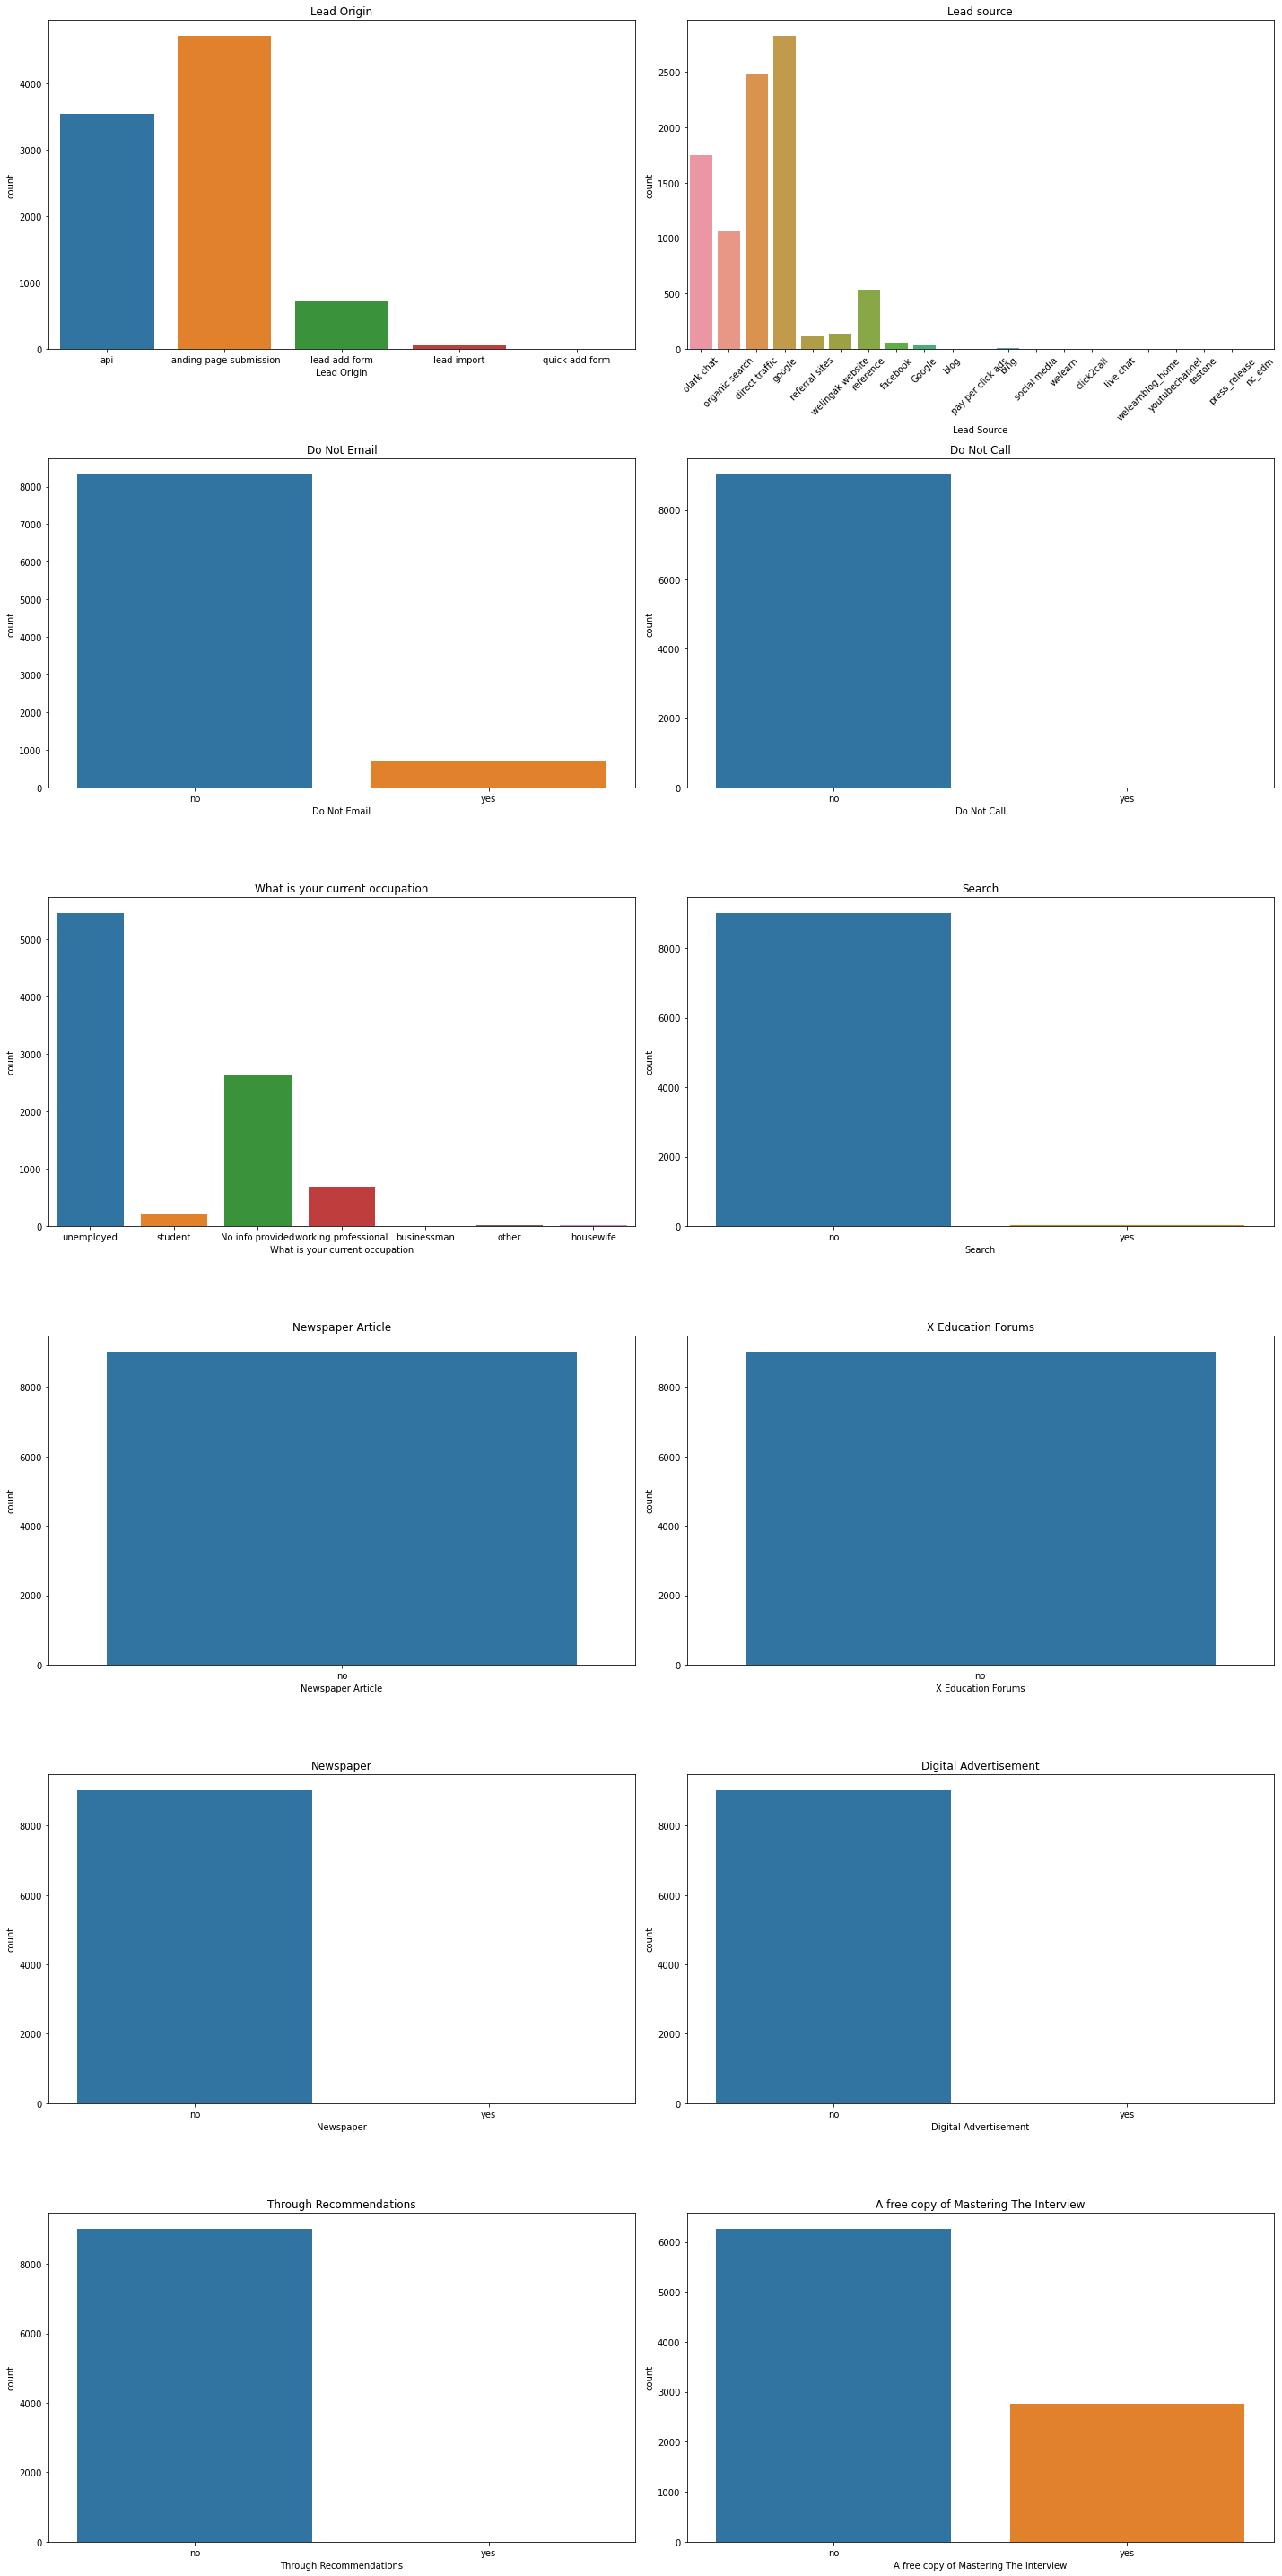

In [42]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(lead['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(lead['Lead Source']).tick_params(axis='x', rotation = 45)
plt.title('Lead source')

plt.subplot(6,2,3)
sns.countplot(lead['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,4)
sns.countplot(lead['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,5)
sns.countplot(lead['What is your current occupation'])
plt.title('What is your current occupation')

plt.subplot(6,2,6)
sns.countplot(lead['Search'])
plt.title('Search')

plt.subplot(6,2,7)
sns.countplot(lead['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,8)
sns.countplot(lead['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,9)
sns.countplot(lead['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,10)
sns.countplot(lead['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,11)
sns.countplot(lead['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,12)
sns.countplot(lead['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.tight_layout()
plt.show()

#### So majorly we can see mostly the lead said no, so we will look into this later for now lets proceed and check the numerical variables

### Univariate analysis of numerical variables

In [43]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9029 non-null   object 
 1   Lead Source                             9029 non-null   object 
 2   Do Not Email                            9029 non-null   object 
 3   Do Not Call                             9029 non-null   object 
 4   Converted                               9029 non-null   int64  
 5   TotalVisits                             9029 non-null   float64
 6   Total Time Spent on Website             9029 non-null   int64  
 7   Page Views Per Visit                    9029 non-null   float64
 8   What is your current occupation         9029 non-null   object 
 9   Search                                  9029 non-null   object 
 10  Newspaper Article                       9029 non-null   obje

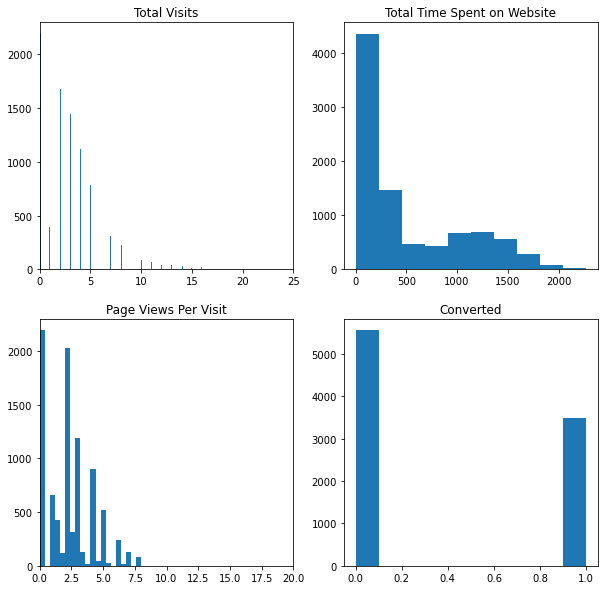

In [44]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(lead['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(2,2,2)
plt.hist(lead['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.hist(lead['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)

plt.subplot(2,2,4)
plt.hist(lead['Converted'])
plt.title('Converted')

plt.show()

#### So we saw even the numerical column concentrate more on thge no side, any how we will deal with this, so now lets proceed further and compare the variables with the converted column to analyse further.

### Relating categorical variables to converted column

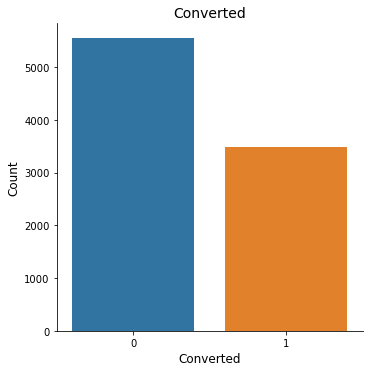

In [45]:
# converted column analysis
plot=sns.catplot(x="Converted", kind="count", data=lead);

plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

#### From the above plot we can see there around 5500 said no and 3500 said yes, meaning out of total leads reached approx 40% said yes.

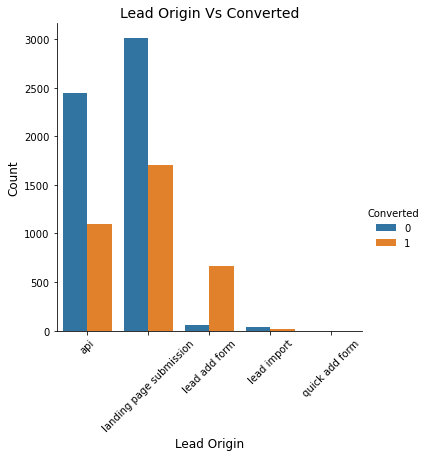

In [46]:
# Lead orgin vs Converted
plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=lead);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=45)
plt.show()


#### From the above plot we can see that the leads mostly got converted from the landing page submission category.


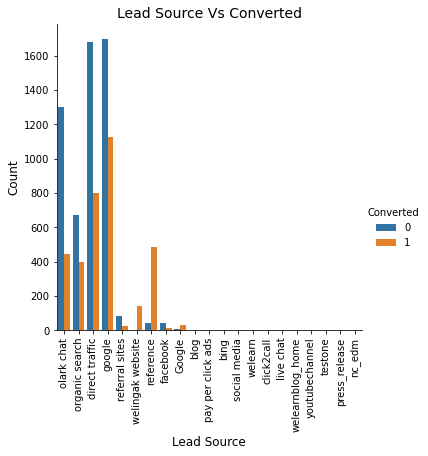

In [47]:
# Lead source vs Converted

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=lead);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

plt.show()

#### Here we can see leads from google were converted the most

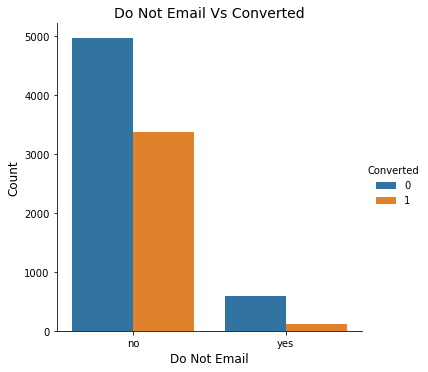

In [48]:
# Do not email vs converted
plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=lead);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

#### Here also the mojor leads are converted by those to who the email was sent.

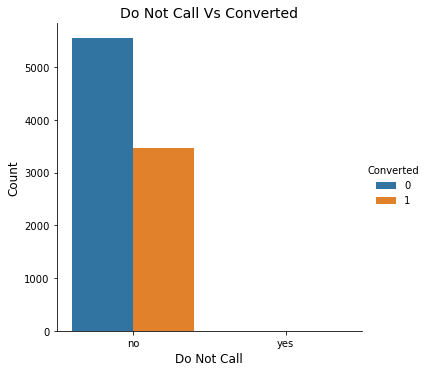

In [49]:
# Do not call vs Converted

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=lead);

plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

#### We can see from the above plot the mojor convertion happened when the call was made.

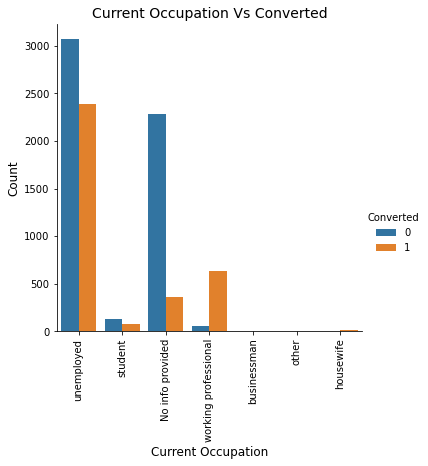

In [50]:
# What is your current occupation vs Converted
plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=lead);
plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

#### The most leads who got converted were unemployed, however other categories reached also got converted.

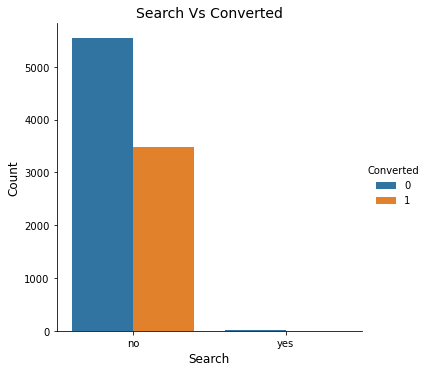

In [51]:
# Search
plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=lead);
plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()


#### we can see the leads who are not from search were converted more.

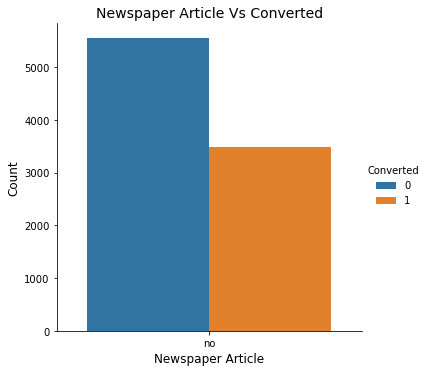

In [52]:
# Newspaper Article vs converted 
plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=lead);
plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

#### Here also leads have converted however it has only one value NO, so it would be preferable to drop this column.

In [53]:
# dropping variable Newspaper Article
lead=lead.drop(['Newspaper Article'],axis=1)

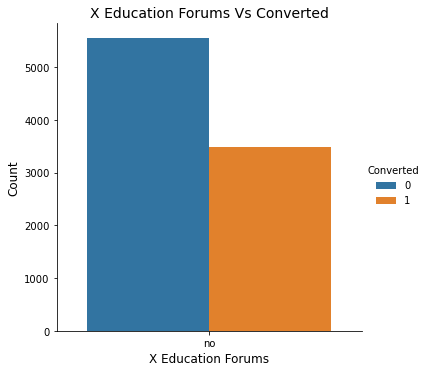

In [54]:
# X Education Forums vs Converted
plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=lead);
plt.title('X Education Forums Vs Converted', fontsize = 14)
plt.xlabel("X Education Forums", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

#### Here also leads have converted but variable has only no value so safe to drop it.

In [55]:
# dropping variable X education forums
lead=lead.drop(['X Education Forums'],axis=1)

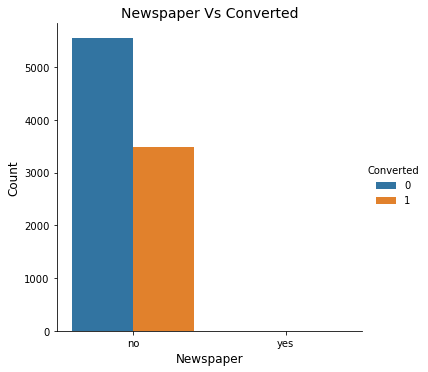

In [56]:
# Newspaper vs Converted 
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=lead);
plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

#### This variable has yes and no value but seems no lead from yes is converted and value max from no so safe to drop it

In [57]:
# Dropping newspaper 
lead=lead.drop(['Newspaper'],axis=1)

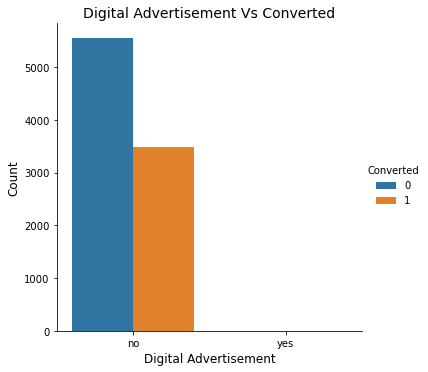

In [58]:
# Digital Advertisement vs converted
plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=lead);
plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

In [59]:
lead['Digital Advertisement'].value_counts()

no     9027
yes       2
Name: Digital Advertisement, dtype: int64

In [60]:
lead.groupby('Digital Advertisement')[['Converted']].sum()

,Converted
Digital Advertisement,
no,3476
yes,1


#### Here we can see one lead had converted from digital advertisement


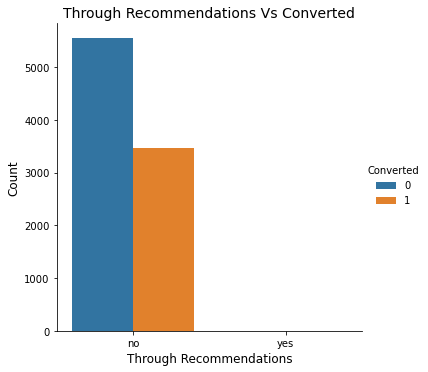

In [61]:
# Through Recomendations vs Converted
plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=lead);
plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

In [62]:
lead['Through Recommendations'].value_counts()

no     9023
yes       6
Name: Through Recommendations, dtype: int64

In [63]:
lead.groupby('Through Recommendations')[['Converted']].sum()

,Converted
Through Recommendations,
no,3472
yes,5


#### Here we can see 5 leads got converted which came through recommendation out of 6

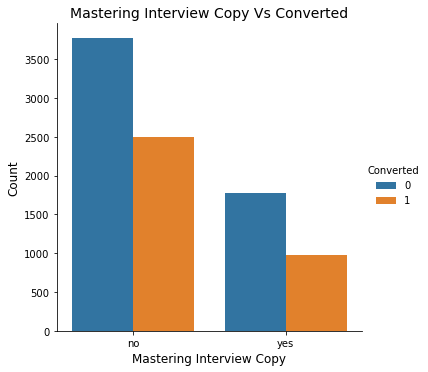

In [64]:
# A free copy of Mastering The Interview vs Converted
plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=lead);
plt.title('Mastering Interview Copy Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

#### Here we can see leads who did not want free mastering interview copy got converted more


###  Relating Numerical variables to Converted

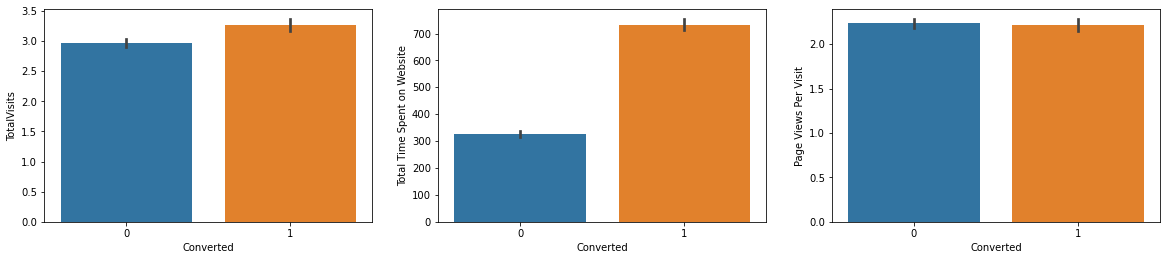

In [65]:
# All numerical variables vs Converted
plt.figure(figsize=(20,18))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', data = lead)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', data = lead)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted',  data = lead)
plt.show()


#### Here from the above  plots we can see the convertion rate is high for the leads from all the numerical variables. Now our analysis is done for all hte variables lets proceed and create dummies

### Data Preparation

#### Creating dummies

In [66]:
# Converting binary variables (Yes/No) to 0/1
variables=variables=['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0, 'yes':1,'no':0})
lead[variables] = lead[variables].apply(binary_map)

In [67]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,api,olark chat,0,0,0,0.0,0,0.0,unemployed,0,0,0,0
1,api,organic search,0,0,0,5.0,674,2.5,unemployed,0,0,0,0
2,landing page submission,direct traffic,0,0,1,2.0,1532,2.0,student,0,0,0,1
3,landing page submission,direct traffic,0,0,0,1.0,305,1.0,unemployed,0,0,0,0
4,landing page submission,google,0,0,1,2.0,1428,1.0,unemployed,0,0,0,0


In [68]:
# Creating dummies for rest of the columns
dummy_creation=pd.get_dummies(lead[['Lead Origin','Lead Source','What is your current occupation']],drop_first=True)

lead=pd.concat([lead,dummy_creation],axis=1)

lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Search,...,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional
0,api,olark chat,0,0,0,0.0,0,0.0,unemployed,0,...,0,0,0,0,0,0,0,0,1,0
1,api,organic search,0,0,0,5.0,674,2.5,unemployed,0,...,0,0,0,0,0,0,0,0,1,0
2,landing page submission,direct traffic,0,0,1,2.0,1532,2.0,student,0,...,0,0,0,0,0,0,0,1,0,0
3,landing page submission,direct traffic,0,0,0,1.0,305,1.0,unemployed,0,...,0,0,0,0,0,0,0,0,1,0
4,landing page submission,google,0,0,1,2.0,1428,1.0,unemployed,0,...,0,0,0,0,0,0,0,0,1,0


In [69]:
# Removing duplicate columns
lead=lead.drop(['Lead Origin', 'Lead Source','What is your current occupation'], axis=1)

In [70]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 40 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9029 non-null   int64  
 1   Do Not Call                                           9029 non-null   int64  
 2   Converted                                             9029 non-null   int64  
 3   TotalVisits                                           9029 non-null   float64
 4   Total Time Spent on Website                           9029 non-null   int64  
 5   Page Views Per Visit                                  9029 non-null   float64
 6   Search                                                9029 non-null   int64  
 7   Digital Advertisement                                 9029 non-null   int64  
 8   Through Recommendations                               9029

In [71]:
# Rechecking for any null values
lead.isnull().sum()

Do Not Email                                            0
Do Not Call                                             0
Converted                                               0
TotalVisits                                             0
Total Time Spent on Website                             0
Page Views Per Visit                                    0
Search                                                  0
Digital Advertisement                                   0
Through Recommendations                                 0
A free copy of Mastering The Interview                  0
Lead Origin_landing page submission                     0
Lead Origin_lead add form                               0
Lead Origin_lead import                                 0
Lead Origin_quick add form                              0
Lead Source_bing                                        0
Lead Source_blog                                        0
Lead Source_click2call                                  0
Lead Source_di

#### So, we have prepared the data and created the dummies now lets proceed further and analyze the correlation among the dummy variables.

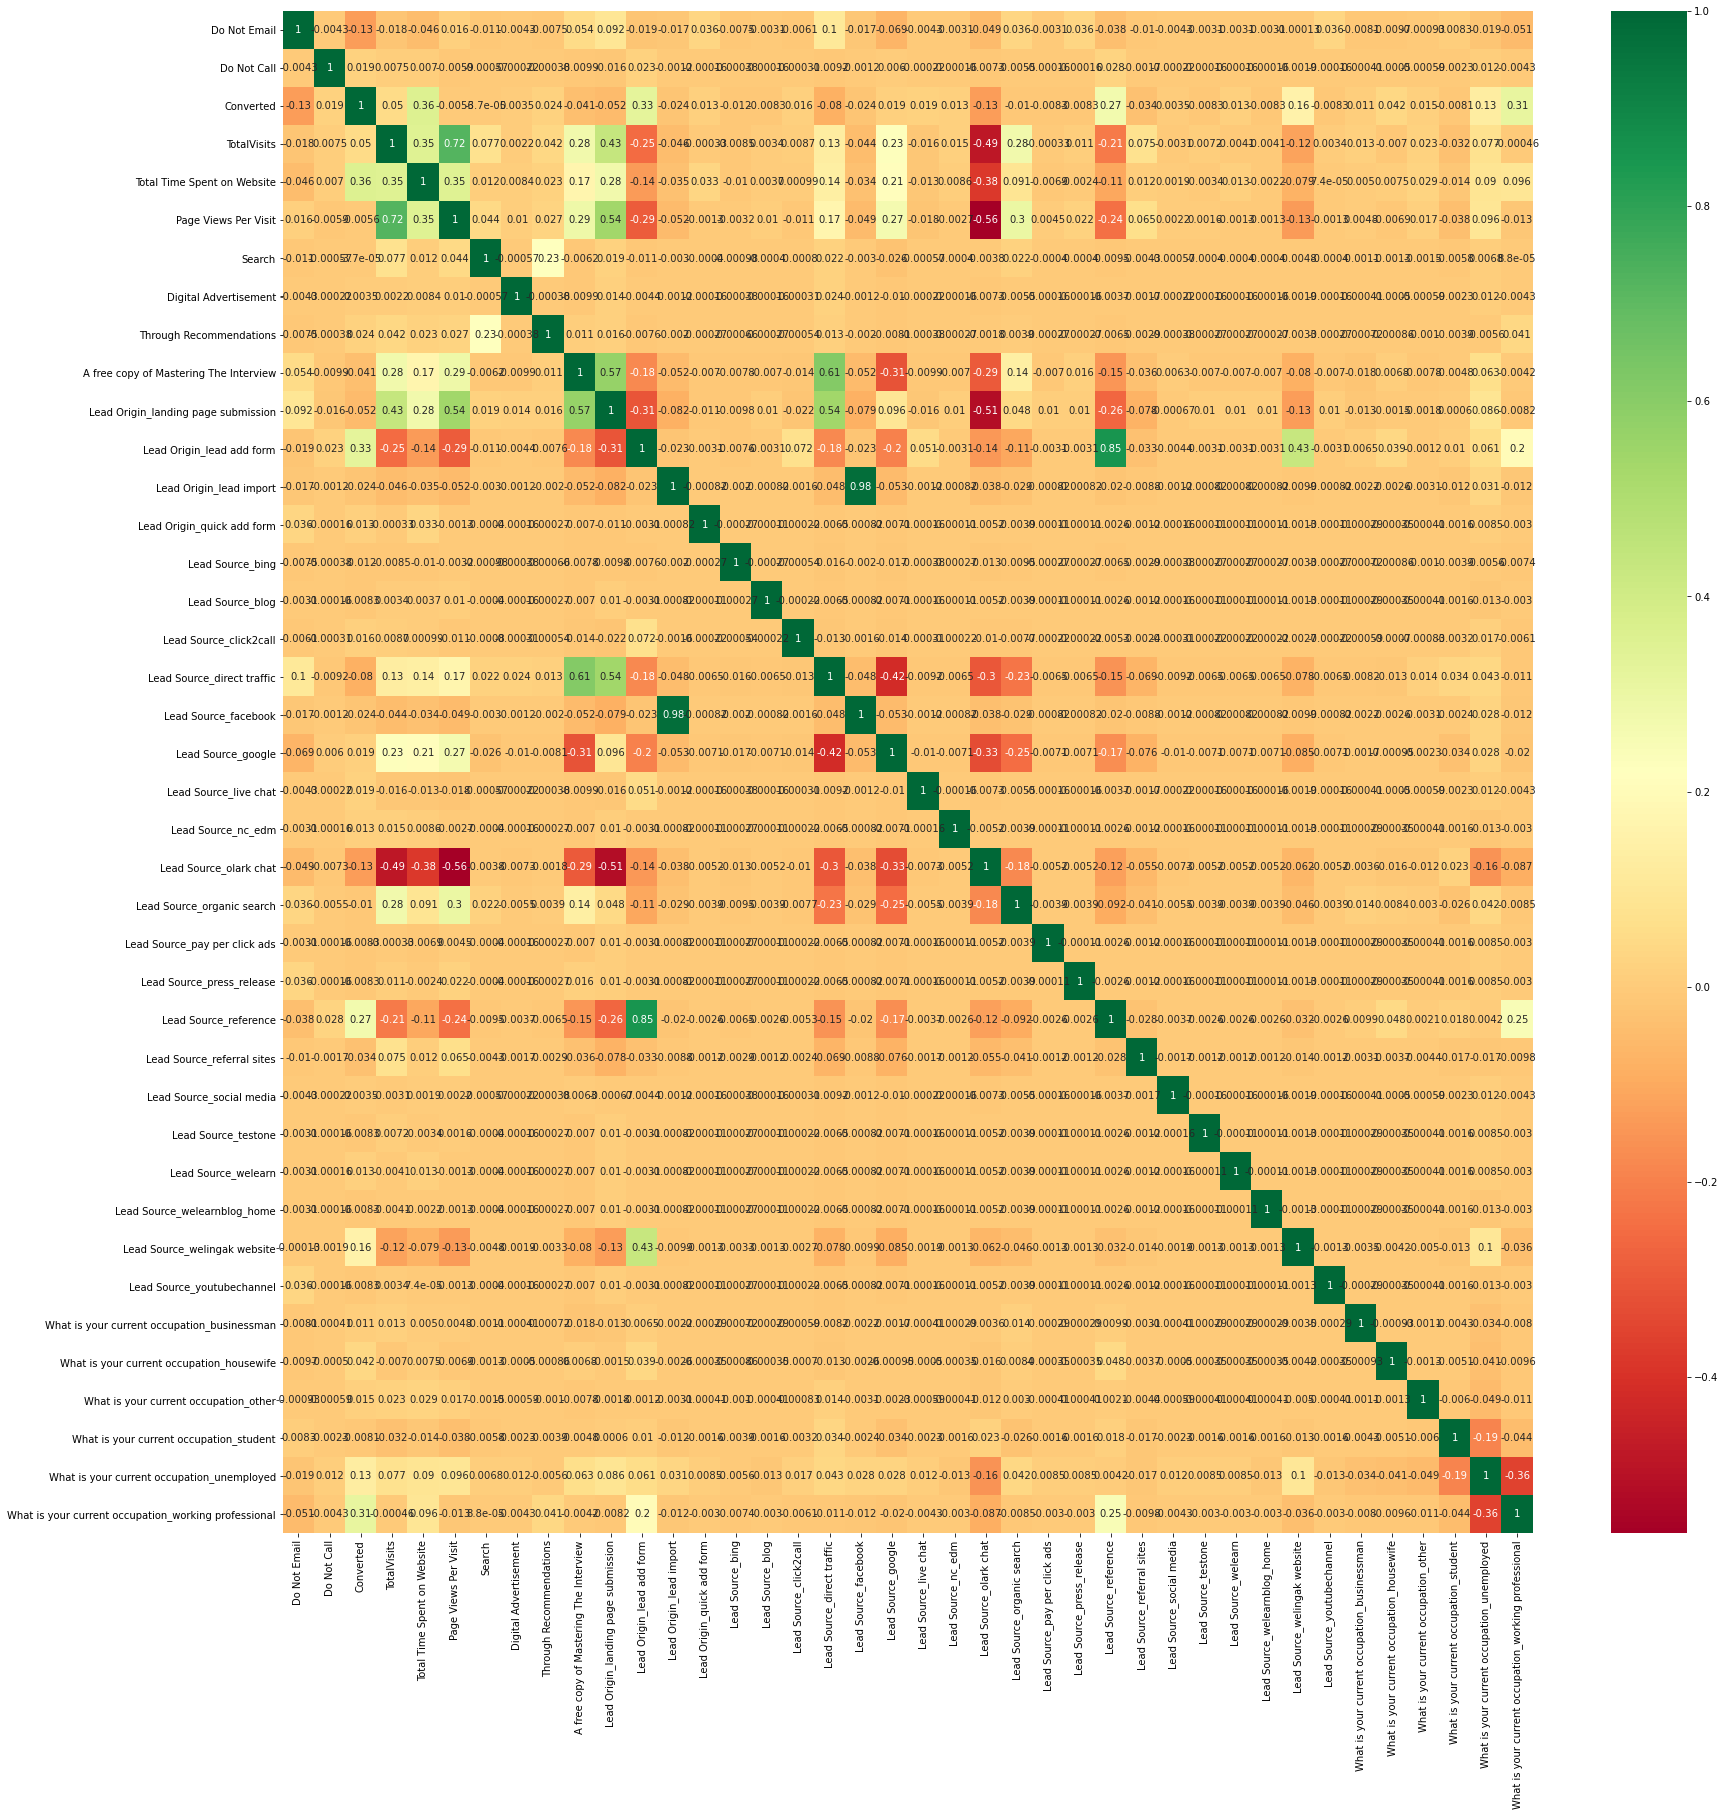

In [72]:
# Checking collinearity via heat map
plt.figure(figsize = (28, 28))
sns.heatmap(lead.corr(), annot = True, cmap="RdYlGn")
plt.show()

#### We can see from the heat map that there are few variables with multicollinearity, however not able to infer clearlydue to huge size of variables so for now lets proceed and we will take care of these later.

### Train - Test Splitting

In [73]:
# importing library
from sklearn.model_selection import train_test_split

In [74]:
# assigning feature variables to x and y
X=lead.drop(['Converted'], axis=1)
X.head(3)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_landing page submission,...,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.0,1532,2.0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0


In [75]:
# assigning response variable to y

y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [76]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### We split the data into test and train now lets proceed feature scalling

### Feature Scalling

In [77]:
# import library
from sklearn.preprocessing import MinMaxScaler

In [78]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_landing page submission,...,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional
5493,0,0,0.1250,0.042254,0.250,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
8064,0,0,0.1875,0.041373,0.375,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4716,1,0,0.1875,0.099032,0.375,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9117,0,0,0.0000,0.000000,0.000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2402,0,0,0.3750,0.381162,0.250,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [79]:
# Checking the leads Conversion Rate percentage

leads_converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
leads_converted

38.50924797873519

#### So, we can see we have around 38.50% Convertion rate. Lets proceed with the mode building process

### Building Model

In [80]:
# Import labrary
import statsmodels.api as sm

In [81]:
# Building model via Logisitc Regression
logm1=sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6284
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 12 Apr 2021   Deviance:                          nan
Time:                        21:48:58   Pearson chi2:                 8.02e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -4.267e+13   3.68e+07  -1.16e+06      0.000   -4.27e+13   -4.27e+13
Do Not Email                                         -6.877e+14   3.22e+06  -2.14e+08      0.000   -6.88e+14   -6.88e+14
Do Not Call                                              4.4073   2.59e-07    1.7e+07      0.000       4.407       4.407
TotalVisits                                             7.4e+14   7.21e+06   1.03e+08      0.000     7.4e+14     7.4e+14
Total Time Spent on Website                           7.573e+14      4e+06   1.89e+08      0.000    7.57e+14    7.57e+14
Page Views Per Visit                                  1.759e+14    6.2e+06   2.84e+07      0.000    1.76e+14    1.76e+14
Search                                                8.335e+14   2.14e+07    3.9e+07      0.000    8.33e+14    8.33e+14
Digital Advertisement                                 4.329e+15   6.72e+07   6.44e+07      0.000    4.33e+15    4.33e+15
Through Recommendations                               2.349e+15   3.37e+07   6.98e+07      0.000    2.35e+15    2.35e+15
A free copy of Mastering The Interview               -2.215e+11   2.66e+06  -8.32e+04      0.000   -2.21e+11   -2.21e+11
Lead Origin_landing page submission                   8.245e+13    2.7e+06   3.05e+07      0.000    8.24e+13    8.24e+13
Lead Origin_lead add form                             1.521e+14   3.64e+07   4.18e+06      0.000    1.52e+14    1.52e+14
Lead Origin_lead import                              -7.322e+14   5.14e+07  -1.42e+07      0.000   -7.32e+14   -7.32e+14
Lead Origin_quick add form                             -14.1601   3.53e-07  -4.01e+07      0.000     -14.160     -14.160
Lead Source_bing                                     -4.343e+14   4.98e+07  -8.73e+06      0.000   -4.34e+14   -4.34e+14
Lead Source_blog                                     -5.384e+14   7.65e+07  -7.03e+06      0.000   -5.38e+14   -5.38e+14
Lead Source_click2call                               -1.309e+15    4.1e+07  -3.19e+07      0.000   -1.31e+15   -1.31e+15
Lead Source_direct traffic                           -1.398e+15   3.68e+07   -3.8e+07      0.000    -1.4e+15    -1.4e+15
Lead Source_facebook                                 -9.597e+14   5.13e+07  -1.87e+07      0.000    -9.6e+14    -9.6e+14
Lead Source_google                                   -8.619e+14   3.68e+07  -2.34e+07      0.000   -8.62e+14   -8.62e+14
Lead Source_live chat                                 3.571e+15   4.93e+07   7.25e+07      0.000    3.57e+15    3.57e+15
Lead Source_nc_edm                                    3.791e+15   7.66e+07   4.95e+07      0.000    3.79e+15    3.79e+15
Lead Source_olark chat                               -4.83

### Feature Selection using RFE

In [82]:
# import library
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [83]:
logreg=LogisticRegression()

In [84]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [85]:
rfe.support_

array([ True, False,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False,  True,  True,  True,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False, False,  True, False, False,  True, False,
        True,  True,  True])

In [86]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 25),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 14),
 ('Search', False, 16),
 ('Digital Advertisement', False, 9),
 ('Through Recommendations', False, 5),
 ('A free copy of Mastering The Interview', False, 20),
 ('Lead Origin_landing page submission', False, 17),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 11),
 ('Lead Origin_quick add form', False, 22),
 ('Lead Source_bing', False, 19),
 ('Lead Source_blog', False, 8),
 ('Lead Source_click2call', True, 1),
 ('Lead Source_direct traffic', True, 1),
 ('Lead Source_facebook', True, 1),
 ('Lead Source_google', True, 1),
 ('Lead Source_live chat', False, 7),
 ('Lead Source_nc_edm', False, 4),
 ('Lead Source_olark chat', False, 3),
 ('Lead Source_organic search', True, 1),
 ('Lead Source_pay per click ads', False, 23),
 ('Lead Source_press_release', False, 13),
 ('Lead Source_reference', False, 6),

In [87]:
# columns with support= True
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_lead add form', 'Lead Source_click2call',
       'Lead Source_direct traffic', 'Lead Source_facebook',
       'Lead Source_google', 'Lead Source_organic search',
       'Lead Source_referral sites', 'Lead Source_welingak website',
       'What is your current occupation_housewife',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional'],
      dtype='object')

In [88]:
# dropping the false
X_train.columns[~rfe.support_]
X_train.columns

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Origin_lead import', 'Lead Origin_quick add form',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_click2call',
       'Lead Source_direct traffic', 'Lead Source_facebook',
       'Lead Source_google', 'Lead Source_live chat', 'Lead Source_nc_edm',
       'Lead Source_olark chat', 'Lead Source_organic search',
       'Lead Source_pay per click ads', 'Lead Source_press_release',
       'Lead Source_reference', 'Lead Source_referral sites',
       'Lead Source_social media', 'Lead Source_testone',
       'Lead Source_welearn', 'Lead Source_welearnblog_home',
       'Lead Source_welingak website', 'Lead Source_youtubechannel',
       'What is your current occupa

In [89]:
# Rebuilding model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2839.0
Date:                Mon, 12 Apr 2021   Deviance:                       5677.9
Time:                        21:49:13   Pearson chi2:                 7.35e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0411      0.091    -22.333      0.000      -2.220      -1.862
Do Not Email                                            -1.1251      0.158     -7.114      0.000      -1.435      -0.815
TotalVisits                                              1.0402      0.233      4.461      0.000       0.583       1.497
Total Time Spent on Website                              4.5213      0.162     27.945      0.000       4.204       4.838
Lead Origin_lead add form                                2.5022      0.204     12.286      0.000       2.103       2.901
Lead Source_click2call                                  -1.7084      1.380     -1.238      0.216      -4.414       0.997
Lead Source_direct traffic                              -1.4045      0.119    -11.827      0.000      -1.637      -1.172
Lead Source_facebook                                    -1.1107      0.434     -2.561      0.010      -1.961      -0.261
Lead Source_google                                      -1.0752      0.116     -9.263      0.000      -1.303      -0.848
Lead Source_organic search                              -1.3412      0.147     -9.154      0.000      -1.628      -1.054
Lead Source_referral sites                              -1.7828      0.344     -5.181      0.000      -2.457      -1.108
Lead Source_welingak website                             2.1361      0.741      2.882      0.004       0.683       3.589
What is your current occupation_housewife               24.0438    1.7e+04      0.001      0.999   -3.33e+04    3.34e+04
What is your current occupation_student                  1.0968      0.216      5.087      0.000       0.674       1.519
What is your current occupation_unemployed               1.3217      0.083     15.938      0.000       1.159       1.484
What is your current occupation_working professional     3.6937      0.186     19.860      0.000       3.329       4.058
========================================================================================================================
"""

In [90]:
# Checking VIF for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,3.60
7,Lead Source_google,2.86
13,What is your current occupation_unemployed,2.63
5,Lead Source_direct traffic,2.61
2,Total Time Spent on Website,2.29
8,Lead Source_organic search,2.00
3,Lead Origin_lead add form,1.67
14,What is your current occupation_working profes...,1.34
10,Lead Source_welingak website,1.29
0,Do Not Email,1.10


In [91]:
# Dropping 'What is your current occupation_housewife' as it has high p_value and is insignificant
col=col.drop('What is your current occupation_housewife',1)

In [92]:
#Rebuilding model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2847.4
Date:                Mon, 12 Apr 2021   Deviance:                       5694.8
Time:                        21:49:14   Pearson chi2:                 7.38e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0261      0.091    -22.275      0.000      -2.204      -1.848
Do Not Email                                            -1.1308      0.158     -7.153      0.000      -1.441      -0.821
TotalVisits                                              1.0245      0.233      4.399      0.000       0.568       1.481
Total Time Spent on Website                              4.5210      0.162     27.988      0.000       4.204       4.838
Lead Origin_lead add form                                2.5229      0.204     12.390      0.000       2.124       2.922
Lead Source_click2call                                  -1.7214      1.380     -1.248      0.212      -4.425       0.983
Lead Source_direct traffic                              -1.3938      0.119    -11.757      0.000      -1.626      -1.161
Lead Source_facebook                                    -1.1046      0.434     -2.548      0.011      -1.954      -0.255
Lead Source_google                                      -1.0650      0.116     -9.191      0.000      -1.292      -0.838
Lead Source_organic search                              -1.3194      0.146     -9.030      0.000      -1.606      -1.033
Lead Source_referral sites                              -1.7753      0.344     -5.163      0.000      -2.449      -1.101
Lead Source_welingak website                             2.1233      0.741      2.864      0.004       0.670       3.576
What is your current occupation_student                  1.0761      0.215      4.994      0.000       0.654       1.498
What is your current occupation_unemployed               1.3000      0.082     15.780      0.000       1.139       1.461
What is your current occupation_working professional     3.6712      0.186     19.767      0.000       3.307       4.035
========================================================================================================================
"""

In [93]:
# Checking VIF for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,3.60
7,Lead Source_google,2.85
12,What is your current occupation_unemployed,2.62
5,Lead Source_direct traffic,2.60
2,Total Time Spent on Website,2.29
8,Lead Source_organic search,1.99
3,Lead Origin_lead add form,1.67
13,What is your current occupation_working profes...,1.34
10,Lead Source_welingak website,1.29
0,Do Not Email,1.10


In [94]:
# Dropping 'Lead Source_click2cal' as it has high p_value
col=col.drop('Lead Source_click2call',1)

In [95]:
#Rebuilding model
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2848.1
Date:                Mon, 12 Apr 2021   Deviance:                       5696.1
Time:                        21:49:15   Pearson chi2:                 7.35e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0261      0.091    -22.275      0.000      -2.204      -1.848
Do Not Email                                            -1.1286      0.158     -7.145      0.000      -1.438      -0.819
TotalVisits                                              1.0235      0.233      4.392      0.000       0.567       1.480
Total Time Spent on Website                              4.5209      0.162     27.989      0.000       4.204       4.838
Lead Origin_lead add form                                2.4981      0.201     12.404      0.000       2.103       2.893
Lead Source_direct traffic                              -1.3936      0.119    -11.754      0.000      -1.626      -1.161
Lead Source_facebook                                    -1.1044      0.434     -2.547      0.011      -1.954      -0.255
Lead Source_google                                      -1.0647      0.116     -9.187      0.000      -1.292      -0.838
Lead Source_organic search                              -1.3191      0.146     -9.026      0.000      -1.606      -1.033
Lead Source_referral sites                              -1.7748      0.344     -5.161      0.000      -2.449      -1.101
Lead Source_welingak website                             2.1480      0.741      2.900      0.004       0.696       3.600
What is your current occupation_student                  1.0773      0.215      5.003      0.000       0.655       1.499
What is your current occupation_unemployed               1.2997      0.082     15.778      0.000       1.138       1.461
What is your current occupation_working professional     3.6723      0.186     19.776      0.000       3.308       4.036
========================================================================================================================
"""

In [96]:
# Checking VIF for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,3.59
6,Lead Source_google,2.85
11,What is your current occupation_unemployed,2.62
4,Lead Source_direct traffic,2.60
2,Total Time Spent on Website,2.29
7,Lead Source_organic search,1.99
3,Lead Origin_lead add form,1.65
12,What is your current occupation_working profes...,1.34
9,Lead Source_welingak website,1.29
0,Do Not Email,1.10


#### Well now we can see our model is fair enough all p_values are < 0.05 , VIF is also <5  and looks significant.so, lets keep this and proceed to make prediction on the Train set.

In [97]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5493    0.141725
8064    0.149180
4716    0.021162
9117    0.325983
2402    0.578326
1796    0.116486
1120    0.116486
253     0.072533
1491    0.129765
2004    0.146138
dtype: float64

In [98]:
# Reshaping
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14172523, 0.1491803 , 0.02116173, 0.32598263, 0.57832648,
       0.11648584, 0.11648584, 0.0725326 , 0.12976464, 0.14613815])

In [99]:
#Creating a df with the actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.141725,5493
1,0,0.149180,8064
2,0,0.021162,4716
3,0,0.325983,9117
4,1,0.578326,2402


In [100]:
#Creating a new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.141725,5493,0
1,0,0.149180,8064,0
2,0,0.021162,4716,0
3,0,0.325983,9117,0
4,1,0.578326,2402,1


#### Now lets go ahead check the confusion matrix


In [101]:
# import library
from sklearn import metrics

In [102]:
# Creating Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3497  412]
 [ 845 1566]]


In [103]:
#### From the above matrix we can say that 

#### Predicted         not_converted    converted
#### Actual
#### not_converted              3497        412
#### converted                   845       1566

In [104]:
# Checking overall accuracy of the model
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8011075949367089


#### Accuracy is fair enough lets go ahead and calculate other metrics.

In [105]:
# Other metrics
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [106]:
# calculating sensitivity of our model

TP / float(TP+FN)

0.6495230194939859

In [107]:
#  calculating specificity

TN / float(TN+FP)

0.894602200051164

In [108]:
# Calculating false postive rate i.e predicting non conversion when leads had actually converted
print(FP/ float(TN+FP))

0.10539779994883602


In [109]:
# calculating positive predictive value 
print (TP / float(TP+FP))

0.7917087967644085


In [110]:
# Calculating Negative predictive value
print (TN / float(TN+ FN))

0.8053892215568862


#### We can see the sensitivity is low so we need improve, however our cutoff was random so lets go ahead and find out the optimum cutoff.

### ROC curve (optimise cutoff) 

In [111]:
# ROC Function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [112]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob,drop_intermediate = False )

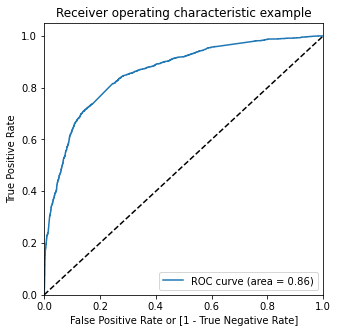

In [113]:
# calling the Roc function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Now lets go ahead find the  Optimal cut off probability which is that probabilty where we get a balanced sensitivity and specificity

In [114]:
# creating columns with different probability cutoffs 
numb=[float(x)/10 for x in range(10)]
for i in numb:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.141725,5493,0,1,1,0,0,0,0,0,0,0,0
1,0,0.149180,8064,0,1,1,0,0,0,0,0,0,0,0
2,0,0.021162,4716,0,1,0,0,0,0,0,0,0,0,0
3,0,0.325983,9117,0,1,1,1,1,0,0,0,0,0,0
4,1,0.578326,2402,1,1,1,1,1,1,1,0,0,0,0


In [115]:
# calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# importing library
from sklearn.metrics import confusion_matrix
# function
number = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in number:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381487  1.000000  0.000000
0.1   0.1  0.517247  0.981750  0.230750
0.2   0.2  0.695253  0.900871  0.568432
0.3   0.3  0.771361  0.828702  0.735994
0.4   0.4  0.802373  0.705102  0.862369
0.5   0.5  0.801108  0.649523  0.894602
0.6   0.6  0.786076  0.572377  0.917882
0.7   0.7  0.762342  0.471589  0.941673
0.8   0.8  0.735443  0.356284  0.969302
0.9   0.9  0.692405  0.206139  0.992325


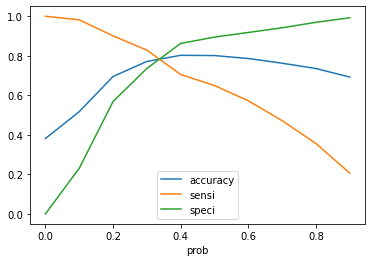

In [116]:
# plotting accuracy sensitivity and specificity for the various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the above graph it looks 0.32 is optimal cutoff lets go ahead and use it.

In [117]:
# making predictions using 0.32 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.32 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.141725,5493,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.149180,8064,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.021162,4716,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.325983,9117,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.578326,2402,1,1,1,1,1,1,1,0,0,0,0,1


In [118]:
# Now let proceed and calculate the leads score
y_train_pred_final['leads_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)


,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,leads_score
0,0,0.141725,5493,0,1,1,0,0,0,0,0,0,0,0,0,14
1,0,0.149180,8064,0,1,1,0,0,0,0,0,0,0,0,0,15
2,0,0.021162,4716,0,1,0,0,0,0,0,0,0,0,0,0,2
3,0,0.325983,9117,0,1,1,1,1,0,0,0,0,0,0,1,33
4,1,0.578326,2402,1,1,1,1,1,1,1,0,0,0,0,1,58
5,0,0.116486,1796,0,1,1,0,0,0,0,0,0,0,0,0,12
6,0,0.116486,1120,0,1,1,0,0,0,0,0,0,0,0,0,12
7,0,0.072533,253,0,1,0,0,0,0,0,0,0,0,0,0,7
8,0,0.129765,1491,0,1,1,0,0,0,0,0,0,0,0,0,13
9,1,0.146138,2004,0,1,1,0,0,0,0,0,0,0,0,0,15


In [119]:
# lets proceed and check how much % of cases are correctly predicted based on the converted column.

correctly_pred = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
correctly_pred['final_predicted'].value_counts()

1    1970
0     441
Name: final_predicted, dtype: int64

In [120]:
# % calculation

1970/float(1970+441)

0.8170883450850269

#### From this we can say that the final prediction of conversions have a target of 82% and conversion requirement as per the X Educations CEO's is 80% . Hence this is a good model. So lets proceed further and calculate the metrics again.

In [121]:
# checking the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.776740506329114

In [122]:
# calculating confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2939,  970],
       [ 441, 1970]], dtype=int64)

In [123]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [124]:
# calculating the sensitivity.

TP / float(TP+FN)

0.8170883450850269

In [125]:
# calculating the specificity
TN / float(TN+FP)

0.7518546942952161

In [126]:
# Calculating false postive rate i.e predicting non conversion when leads had actually converted
print(FP/ float(TN+FP))

0.24814530570478383


In [127]:
# calculating positive predictive value 
print (TP / float(TP+FP))

0.6700680272108843


In [128]:
# Calculating Negative predictive value
print (TN / float(TN+ FN))

0.8695266272189349


### Precision and Recal

In [129]:
# importing Library
from sklearn.metrics import precision_score, recall_score

In [130]:
# precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6700680272108843

In [131]:
# recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8170883450850269

### Precision - Recall trade off

In [132]:
# import library
from sklearn.metrics import precision_recall_curve

In [133]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6315    0
 6316    1
 6317    1
 6318    1
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6315    0
 6316    1
 6317    1
 6318    1
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [134]:
p,r,thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

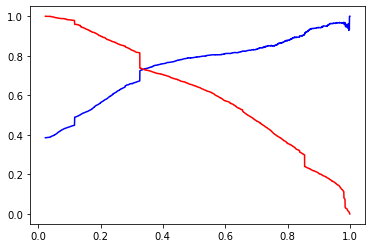

In [135]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


#### Now lets proceed and make predictions on the Test set

### Test set Predictions

In [136]:
# Scaling numeric values
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [137]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_organic search,Lead Source_referral sites,Lead Source_welingak website,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional
4664,0,0.0000,0.000000,0,0,0,0,0,0,0,0,1,0
5394,0,0.2500,0.072183,0,0,0,0,0,0,0,0,0,0
1595,0,0.2500,0.515405,0,0,0,0,1,0,0,0,0,1
2111,0,0.4375,0.229754,0,1,0,0,0,0,0,0,0,0
9182,0,0.0000,0.000000,0,0,0,0,0,0,0,0,1,0


In [138]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test[col])

In [139]:
y_test_pred = res.predict(X_test_sm)

In [140]:
y_test_pred[:10]

4664    0.325983
5394    0.190938
1595    0.948488
2111    0.126392
9182    0.325983
1055    0.658648
541     0.101661
446     0.984392
3728    0.041421
4249    0.023526
dtype: float64

In [141]:
# Converting y_pred to a df which is an array
y_pred1 = pd.DataFrame(y_test_pred)
y_pred1.head()

,0
4664,0.325983
5394,0.190938
1595,0.948488
2111,0.126392
9182,0.325983


In [142]:
# Converting y_test to a df
y_test_df = pd.DataFrame(y_test)

In [143]:
# Putting of LeadId to index
y_test_df['LeadId'] = y_test_df.index

In [144]:
# Removing index from both the dfs so that we can append them side by side 

y_pred1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [145]:
# Appending of y_test_df and y_pred1

y_pred_final = pd.concat([y_test_df, y_pred1],axis=1)
y_pred_final.head()

,Converted,LeadId,0
0,0,4664,0.325983
1,0,5394,0.190938
2,1,1595,0.948488
3,0,2111,0.126392
4,0,9182,0.325983


In [146]:
# Renaming the column  
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final[['LeadId','Converted','Converted_Prob']]
# Printing head
y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,4664,0,0.325983
1,5394,0,0.190938
2,1595,1,0.948488
3,2111,0,0.126392
4,9182,0,0.325983


In [147]:
# Making prediction using cut off 0.32
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.32 else 0)
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,4664,0,0.325983,1
1,5394,0,0.190938,0
2,1595,1,0.948488,1
3,2111,0,0.126392,0
4,9182,0,0.325983,1


In [148]:
# calculating the lead score
y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final=y_pred_final.sort_values(by = "lead_score", ascending = False)
y_pred_final.head(15)

,LeadId,Converted,Converted_Prob,final_predicted,lead_score
2087,631,1,0.995644,1,100
927,79,1,0.996792,1,100
828,3615,1,0.998277,1,100
366,7327,1,0.997289,1,100
1320,1548,1,0.996370,1,100
309,819,1,0.995513,1,100
2486,2378,1,0.998770,1,100
677,7187,1,0.997705,1,100
1014,5942,1,0.997869,1,100
2412,267,1,0.995294,1,100


In [149]:
# lets proceed and check how much % of cases are correctly predicted based on the converted column.

correctly_pred_test = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
correctly_pred_test['final_predicted'].value_counts()

1    890
0    176
Name: final_predicted, dtype: int64

In [150]:
# % calculation

890/float(890+176)

0.8348968105065666

#### We can see that the prediction rate for the test set is around 83 % and it was 82 % for the train set, so our model is good. Now lets proceed and calculate the other metrics.

In [151]:
# checking the overall accuracy of the model.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7818383167220376

In [152]:
# Calculating the confusion matrix
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1228,  415],
       [ 176,  890]], dtype=int64)

In [153]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [154]:
# calculating the sensitivity.
TP / float(TP+FN)

0.8348968105065666

In [155]:
# calculating the specificity
TN / float(TN+FP)

0.7474132684114425

In [156]:
# Train set metrics
# accuracy = 78% , sensitivity  = 82% , specificity = 75%

# Test set metrics
# accuracy = 78% , sensitivity  = 83% , specificity = 75%



#### We can see our metrics of the test set are almost similar to the train set metrics.  So our model is fit and now lets proceed. 

### Precision and Recal

In [157]:
# precision
print('precision is :- ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))
# recall
print('recall is :- ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision is :-  0.6819923371647509
recall is :-  0.8348968105065666


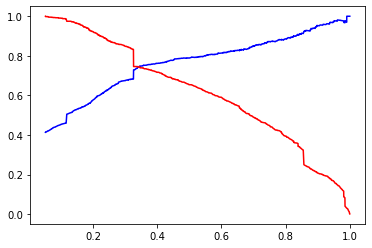

In [158]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Inferences


-  The features that matter the most in giving us potential leads are:
-  Total visits made by lead on a website is more, the convertion rate is higher.
-  When the lead source is from Google, direct traffic, organic search, from leads given add form, welingak website, referral      sites and facebook, it has a inverse or a direct relation respectively based on the coefficients.
-  when the leads occupation status is unemployed.
-  when the lead spents more time on website.
-  when lead is a working professional,i.e. it could mean possibly he/she wants to advance more in terms of career.
-  when lead is as student, i.e. meaning possibly lead is looking for career advancement oppurtunity via more education.
-  To sum up focussing on the above said features would help us in getting more potential leads and inturn giving the X education company a better convertion rate.